In [1]:
#Lets import some important libraries first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing our data for analysis

In [2]:
df=pd.read_csv(r'D:\Python projects\hotel/hotel_bookings.csv',encoding='utf-8')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.shape

(119390, 32)

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.fillna(0,inplace=True)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [9]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [10]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [11]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [12]:
filter= (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [13]:
data=df[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Guest home town analysis

In [14]:
resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
city=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [85]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [16]:
#!pip install plotly

In [17]:
import plotly.graph_objs as go
from plotly.offline import  iplot
import plotly.express as px

In [18]:
labels=resort['country'].value_counts().index
values=resort['country'].value_counts()

In [91]:
trace=go.Pie(labels=labels,values=values,hoverinfo='label+percent',textinfo='value')
iplot([trace])

# Analysis on choropleth map

In [21]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [22]:
country_wise_data.columns=['country','no of guests']

In [23]:
country_wise_data.head()

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [24]:
px.choropleth(data_frame=country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no of guests'],
             hover_name=country_wise_data['country'],
             title='Home country of guest')

# Guest pay for room per night

In [25]:
data2=data[data['is_canceled']==0]

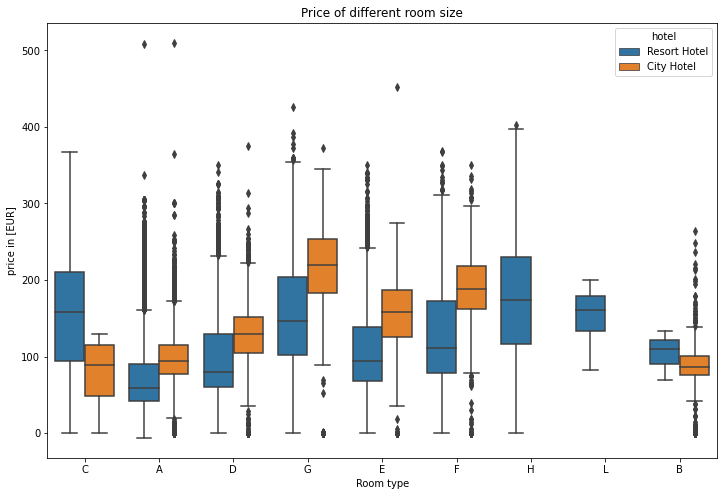

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',data=data2, hue='hotel')
plt.title('Price of different room size')
plt.xlabel('Room type')
plt.ylabel('price in [EUR]')
plt.show()

# Price increase over the year

In [27]:
data_resort=resort[resort['is_canceled']==0]
data_city=city[city['is_canceled']==0]


In [28]:
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [29]:
resort_hotel=data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel=data_city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [30]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']

In [31]:
final.head()

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983


In [32]:
#!pip install sorted-months-weekdays
#!pip install sort-dataframeby-monthorweek

In [33]:
import sort_dataframeby_monthorweek as sd

In [34]:
final2=sd.Sort_Dataframeby_Month(final,'month')
final2.head()

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827


In [35]:
px.line(final2,x='month',y=['price_for_resort','price_for_city_hotel'],title='Room Price per night over the year')



# Distribustion of nights spent at hotel by market segment and Hotel type

In [36]:
pd.set_option('display.max_columns', None)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

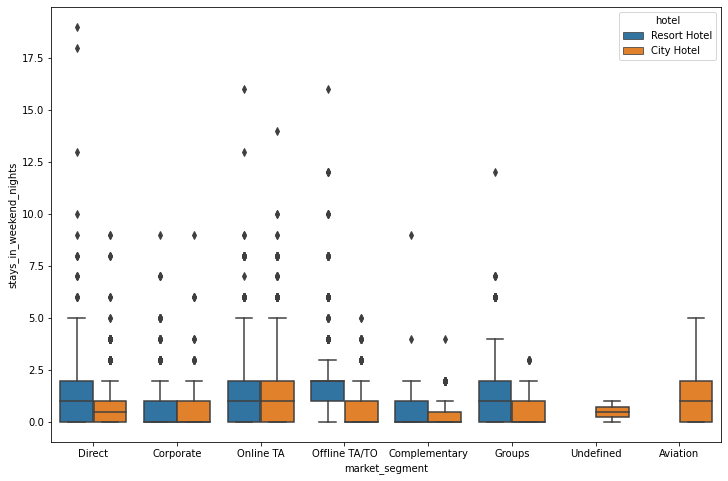

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',hue='hotel',data=data)

# Preference of Guest

In [38]:
data['meal'].value_counts()

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [39]:
px.pie(data,values=data['meal'].value_counts(),names=data['meal'].value_counts().index,hole=0.5)

# Special request done by teh customer

In [40]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,151.20,0,2,Check-Out,9/7/2017


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

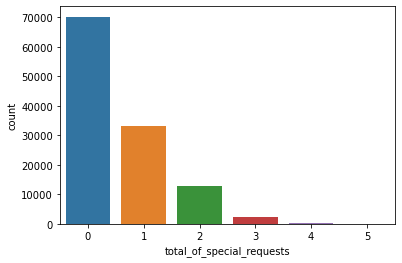

In [41]:
sns.countplot(data['total_of_special_requests'])

# Pivot table of relationship between cancellation and special request

In [42]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [43]:
pivot=data.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename({'total_of_special_requests':'count'}).unstack()

<AxesSubplot:xlabel='total_of_special_requests'>

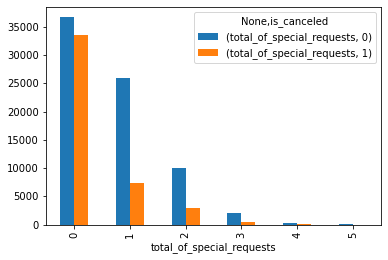

In [44]:
pivot.plot(kind='bar')

# Most busy month or guest are highest

In [45]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guest']
rush_resort

,month,no of guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [46]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guest']
rush_city

,month,no of guest
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [47]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush

,month,no of guest_x,no of guest_y
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [48]:
final_rush.columns=['month','no of guest in resort','no of guest in city']
final_rush

,month,no of guest in resort,no of guest in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [49]:
final_rush2=sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='month')
final_rush2

,month,no of guest in resort,no of guest in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [50]:
px.line(data_frame=final_rush2, x='month',y=['no of guest in city','no of guest in resort'],title='Total no of guest per month')

# How long people stay at hotel

In [51]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [52]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [53]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [54]:
clean_data['total_nights']=clean_data['stays_in_week_nights'] + clean_data['stays_in_weekend_nights']

C:\Users\DELL\AppData\Local\Temp\ipykernel_2408\2449445705.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [57]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [58]:
stay=stay.rename(columns={'is_canceled':'No of stay'})
stay.head()

,total_nights,hotel,No of stay
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


<AxesSubplot:xlabel='total_nights', ylabel='No of stay'>

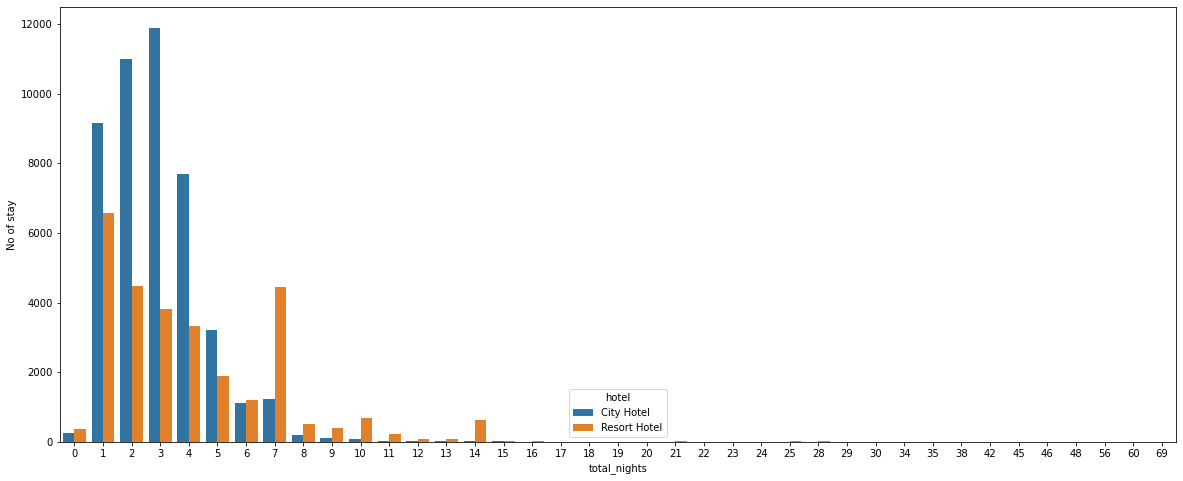

In [84]:
plt.figure(figsize=(20,8))
sns.barplot(x='total_nights',y='No of stay',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=stay)

# Booking by market segment

In [60]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [61]:
px.pie(clean_data,names=clean_data['market_segment'].value_counts().index,values=clean_data['market_segment'].value_counts(),title='Bookings by market segment')

# Price per night and perrson based on bookings and room

<AxesSubplot:xlabel='market_segment', ylabel='adr'>

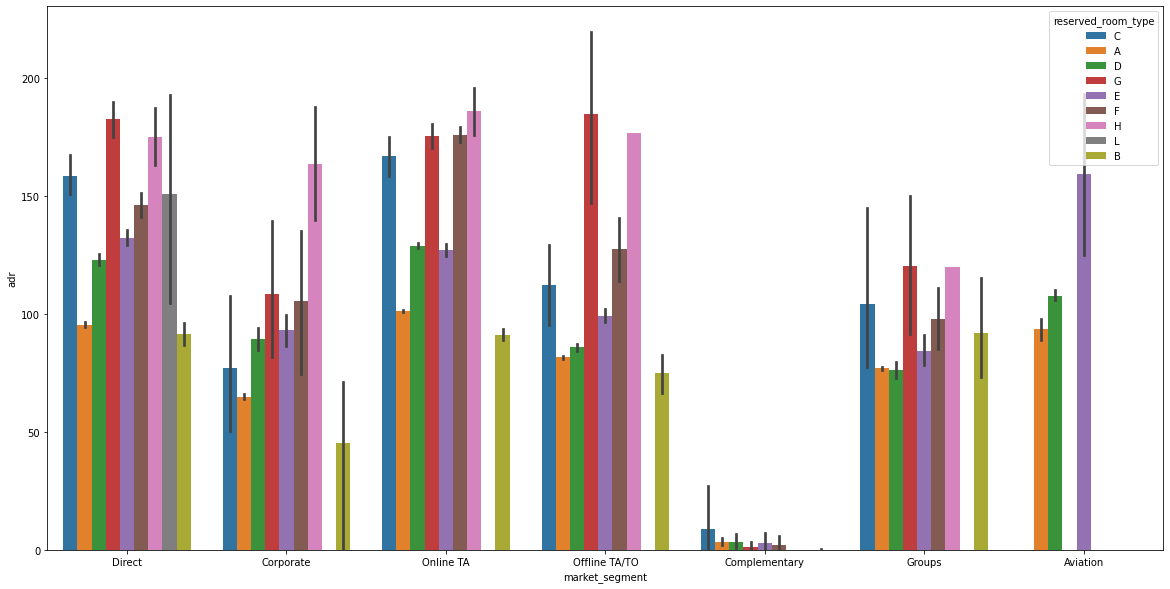

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment',y='adr',hue='reserved_room_type',data=clean_data)

# How many bookings were canceled

In [63]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

In [64]:
cancel=data[data['is_canceled']==1]
cancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,2017,May,18,6,2,1,1,0.0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,0.0,450.0,0,Transient,125.0,0,0,No-Show,5/6/2017
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,6/5/2017
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,5/31/2017
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,0.0,238.0,0,Transient,65.0,0,0,No-Show,7/17/2017


In [65]:
len(cancel[cancel['hotel']=='Resort Hotel'])

11120

In [66]:
len(cancel[cancel['hotel']=='City Hotel'])

33079

In [67]:
px.pie(data_frame=cancel,values=[11120,33079],names=['rh_cancellation','ch_cancellation'])

# Highest No of cancellation by month

In [73]:
cancellation=data[data['is_canceled']==1]
cancellation.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [74]:
cancellation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [76]:
cancel_month=data.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]
cancelled

,arrival_date_month,hotel,is_canceled
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [77]:
cancelled=cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [78]:
final=sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,3730
1,January,Resort Hotel,2191
2,February,City Hotel,4950
3,February,Resort Hotel,3102
4,March,City Hotel,6434
5,March,Resort Hotel,3334
6,April,City Hotel,7469
7,April,Resort Hotel,3609
8,May,City Hotel,8221
9,May,Resort Hotel,3559


<AxesSubplot:xlabel='arrival_date_month', ylabel='no of cancellations'>

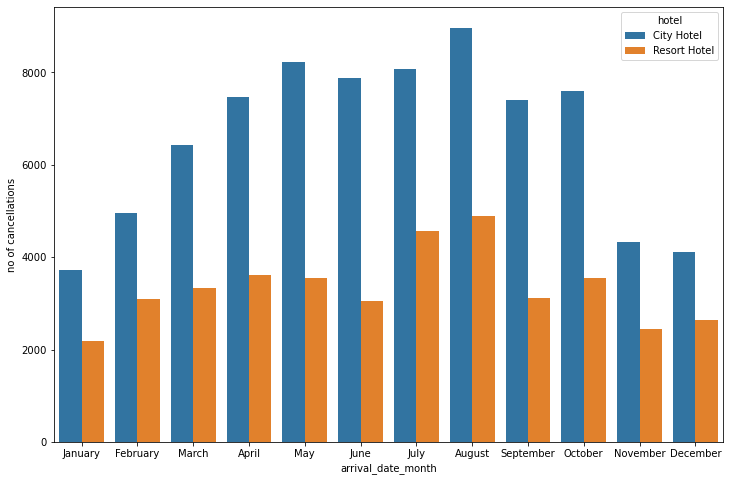

In [79]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "arrival_date_month", y = "no of cancellations" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=final)